In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
sales = pd.read_csv('/content/drive/My Drive/SalesData.csv')
sales

,Attainment,Calls,Emails,Engagement,HasDegree,HoursWorked,Live,Meetings,Pipeline,Prizes,Questions,Ratio,Sentiment,TeamSize,TrainProd,TrainSales
0,0.053575,61.0,929,3.424084,0.75,454.563783,0.243379,21,256354,960,6.0,0.620010,5.050705,10,21.0,65
1,0.060142,70.0,517,3.128567,1.00,464.381755,0.207529,21,252552,1406,3.0,0.882232,4.934229,8,19.0,62
2,0.062694,69.0,231,3.237094,0.50,470.261626,0.136013,21,282094,1655,4.0,0.812933,6.146106,6,27.0,64
3,0.072924,33.0,532,NaN,0.25,435.785692,0.220848,18,222374,2385,400.0,0.732378,5.186325,13,17.0,64
4,0.077626,38.0,428,3.612517,0.75,481.584611,0.353637,29,217384,1733,4.0,0.833299,5.470473,8,18.0,55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
473,2.310336,71.0,635,3.903871,0.25,487.205679,0.620823,23,321498,2687,5.0,0.694004,6.706751,8,27.0,69
474,2.338629,69.0,303,3.616292,0.00,457.488144,0.592753,26,324659,3150,5.0,0.685805,7.058483,9,32.0,54
475,2.548678,57.0,818,4.185094,0.25,470.960123,0.594773,24,347032,2721,4.0,0.634341,7.162894,11,29.0,75
476,2.669492,61.0,655,3.999089,0.25,479.703249,0.619596,31,269709,3227,6.0,0.615081,7.447181,8,31.0,75


In [ ]:
# Null values
sales.isnull().sum()

Attainment     0
Calls          5
Emails         0
Engagement     5
HasDegree      0
HoursWorked    5
Live           0
Meetings       0
Pipeline       0
Prizes         0
Questions      5
Ratio          0
Sentiment      5
TeamSize       0
TrainProd      5
TrainSales     0
dtype: int64

In [ ]:
# Outliers

outliers = pd.DataFrame(
    columns = ['min_cutoff', 'below_min', 'max_cutoff', 'above_max']
)

for col in sales.columns:
  if pd.api.types.is_numeric_dtype(sales[col]) and not \
  all(sales[col].value_counts().index.isin([1,0])):
    
    min_cutoff = sales[col].mean() - sales[col].std() * 3
    max_cutoff = sales[col].mean() + sales[col].std() * 3

    below_min = sum(sales[col] < min_cutoff)
    above_max = sum(sales[col] > max_cutoff)

    if col != "Attainment":
      for i, value in enumerate(sales[col]):
        if value < min_cutoff:
          print(col, value)         #Just to see what values we are working with
        elif value > max_cutoff:
          print(col, value)       #Just to see what values we are working with

    outliers.loc[col] = (min_cutoff, below_min, max_cutoff, above_max)

outliers

Calls 18.0
Emails 2535
Emails 2174
Emails 1972
Emails 2123
Emails 1965
Emails 1918
Emails 2192
Emails 2694
HasDegree 25.0
HasDegree 25.0
HasDegree 25.0
HasDegree 75.0
HoursWorked 47254.23585
HoursWorked 47062.54242
HoursWorked 46380.54038
HoursWorked 52443.833060000004
HoursWorked 46175.16236
Questions 400.0
Questions 400.0
Questions 500.0
Questions 600.0
Questions 600.0
Sentiment 607.7105152
Sentiment 556.6373437999999
Sentiment 501.67145530000005
Sentiment 540.8985669
Sentiment 429.39330250000006
TrainProd 1800.0
TrainProd 2800.0
TrainProd 2500.0
TrainProd 2800.0
TrainProd 2000.0
TrainSales 5300
TrainSales 6300
TrainSales 6300
TrainSales 6200
TrainSales 6600


,min_cutoff,below_min,max_cutoff,above_max
Attainment,-0.832813,0.0,2.185121,7.0
Calls,24.715405,1.0,95.715885,0.0
Emails,-678.902271,0.0,1907.165870,8.0
Engagement,2.367018,0.0,5.046764,0.0
HasDegree,-11.003005,0.0,12.585641,4.0
HoursWorked,-13589.766999,0.0,15551.793851,5.0
Live,-0.084663,0.0,0.969638,0.0
Meetings,6.305889,0.0,41.715032,0.0
Pipeline,151697.776362,0.0,421955.089747,0.0
Prizes,502.132505,0.0,4013.574608,0.0


# Step 1 - Data Cleaning

In [ ]:
# median imputation for nulls

sales = sales.fillna(
    value = {
        "Calls" : sales["Calls"].median(),
        "Engagement" : sales["Engagement"].median(),
        "HoursWorked" : sales["HoursWorked"].median(),
        "Questions" : sales["Questions"].median(),
        "Sentiment" : sales["Sentiment"].median(),
        "TrainProd" : sales["TrainProd"].median()
    }
)

In [ ]:
sales.isnull().sum()
#looks like it worked for the nulls

Attainment     0
Calls          0
Emails         0
Engagement     0
HasDegree      0
HoursWorked    0
Live           0
Meetings       0
Pipeline       0
Prizes         0
Questions      0
Ratio          0
Sentiment      0
TeamSize       0
TrainProd      0
TrainSales     0
dtype: int64

In [ ]:
# median imputation for nulls

check = pd.DataFrame(columns=["min_cutoff", "max_cutoff"])

for col in sales.columns:

  if pd.api.types.is_numeric_dtype(sales[col]) and not \
  all(sales[col].value_counts().index.isin([1,0])):

    min_cutoff = sales[col].mean() - sales[col].std() * 3
    max_cutoff = sales[col].mean() + sales[col].std() * 3
    
    if col != "Attainment":
      for i, value in enumerate(sales[col]):
        if value < min_cutoff:
          sales = sales.replace(value, sales[col].median())
        elif value > max_cutoff:
          sales = sales.replace(value, sales[col].median())

    check.loc[col] = (min_cutoff, max_cutoff)

In [ ]:
check["Max"] = sales.max()
check["Min"] = sales.min()

In [ ]:
check
# looks like it worked for outliers, because all max and min values are within the cutoffs

,min_cutoff,max_cutoff,Max,Min
Attainment,-0.832813,2.185121,3.296522,0.053575
Calls,24.909346,95.538352,93.000000,0.500000
Emails,-678.902271,1907.165870,1869.000000,5.000000
Engagement,2.374043,5.039707,4.629195,2.648679
HasDegree,-11.003005,12.585641,1.000000,0.000000
HoursWorked,-13519.227010,15470.804664,536.141246,413.711466
Live,-0.084663,0.969638,0.845823,-0.063946
Meetings,6.305889,41.715032,41.000000,7.000000
Pipeline,151697.776362,421955.089747,393524.000000,182589.000000
Prizes,482.176443,4025.091339,3787.000000,518.000000


In [ ]:
# Write to cleaned csv file
sales.to_csv("/content/drive/My Drive/FinchMalorie_Data.csv")

# Step 2 - EDA

In [ ]:
myDict = {
    'VariableName' : sales.columns, 
    'Min' : sales.min(), 
    'Max' : sales.max(), 
    'Median' : sales.median(), 
    'Mean' : sales.mean(), 
    'StdDeviation' : sales.std(), 
    'IsNormal' : True, 
    'CorrelationWithOutput' : 0
}
summary = pd.DataFrame(myDict)

In [ ]:
# The conservative "rule of thumb" regarding skewness and kurtosis is 
# that they must be within the range of -1 to 1 in order to be considered "normal enough" 

normality = pd.DataFrame(columns=['normality'])

for col in sales.columns:
  skew = sales[col].skew()
  kurt = sales[col].kurt()

  if (abs(skew) > 1 or abs(kurt) > 1):
    print(col, abs(skew), abs(kurt))  #to check
    normality.loc[col] = "False"
  else:
    print(col, abs(skew), abs(kurt))  #check
    normality.loc[col] = "True"

summary["IsNormal"] = normality

Attainment 1.4607203739896502 2.704106792516662
Calls 1.3228456236568864 4.212558186358908
Emails 1.0059563381983354 0.7190657360528427
Engagement 0.0704460024413192 1.1987505802263465
HasDegree 0.0695825999641294 1.3671442556742195
HoursWorked 0.0269788266155303 0.2469035487287239
Live 0.045017653971963376 0.987324352122418
Meetings 0.16808437021307734 0.06598590529722959
Pipeline 0.032184555927709704 1.062265825396002
Prizes 0.06916437646300051 0.27669154517882344
Questions 0.10826410095773013 0.0531906882226596
Ratio 0.025814375416609137 0.15324739269733856
Sentiment 0.0741476309278651 0.9450290797864174
TeamSize 0.003375388436528641 0.21180600718570153
TrainProd 1.3706974623411492 2.7369141358602653
TrainSales 0.048632510785379064 0.03194553502852093


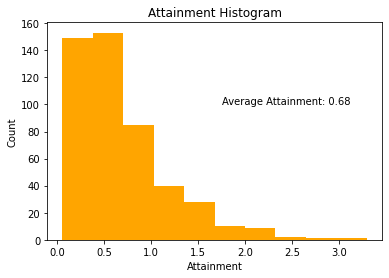

In [ ]:
# include a histogram of your output variable

# Summary statistics included somewhere on the plot 
#(the average for a univariate plot, the correlation coecient for a bivariate plot)

s= "Average Attainment: " + str(round(sales["Attainment"].mean(),2))

plt.hist(sales["Attainment"], color="orange")
plt.title("Attainment Histogram")
plt.xlabel("Attainment")
plt.ylabel("Count")
plt.text(1.75,100, s=s)
plt.show()

# Step 3 - Picking the variables for your report

In [ ]:
# adding correlation column
corr = pd.DataFrame(columns=['corr'])

for col in sales.columns:
  correlate = sales["Attainment"].corr(sales[col])
  corr.loc[col] = correlate

summary["CorrelationWithOutput"] = corr

In [ ]:
# Write to cleaned csv file
summary.to_csv("/content/drive/My Drive/FinchMalorie_EDA.csv")

In [ ]:
summary.sort_values(by=["CorrelationWithOutput"], ascending=False)

,VariableName,Min,Max,Median,Mean,StdDeviation,IsNormal,CorrelationWithOutput
Attainment,Attainment,0.053575,3.296522,0.555141,0.676154,0.502989,False,1.000000
Pipeline,Pipeline,182589.000000,393524.000000,287328.000000,286826.433054,45042.885564,False,0.632408
Live,Live,-0.063946,0.845823,0.416401,0.442488,0.175717,True,0.619961
Engagement,Engagement,2.648679,4.629195,3.705335,3.706875,0.444277,False,0.619398
Sentiment,Sentiment,2.895637,8.837322,6.131435,6.068376,1.247619,True,0.608089
Prizes,Prizes,518.000000,3787.000000,2256.000000,2253.633891,590.485816,True,0.361670
Questions,Questions,1.000000,8.000000,5.000000,4.592050,1.152383,True,0.350606
TrainSales,TrainSales,32.000000,90.000000,64.000000,64.133891,9.006570,True,0.348311
Calls,Calls,0.500000,93.000000,60.000000,58.599372,14.470966,False,0.105764
HoursWorked,HoursWorked,413.711466,536.141246,481.541723,480.164129,19.229329,True,0.059279


# Step 4 - Defend your choices

1. A two-three sentence explanation of correlation and why it's useful in this context

Within Data Analysis with bivariate data, it is important to understand the relationship between pairs of variables. Within this context of the Sales data, as TeamSize (or any other feature of the data) increases, does Attainment, our output, increase, decrease or remain the same?
We would like to find a "cause and effect" relationship, so that in future decision making within the company at hand, decisions made will be more informed, and consequences of those decisions will have been foreseen.

The correlation coefficient calculated in the summary dataframe ranges from -1 to 1 and indicates a positive or negative relationship between the dependent and independent variables. The further from 0 the correlation coefficient is, the more strong the relationship is. 

# According to the sorted Summary dataframe, it looks like Pipeline, Live, Engagement, and Sentiment are among the variables with the most correlation with Attainment.




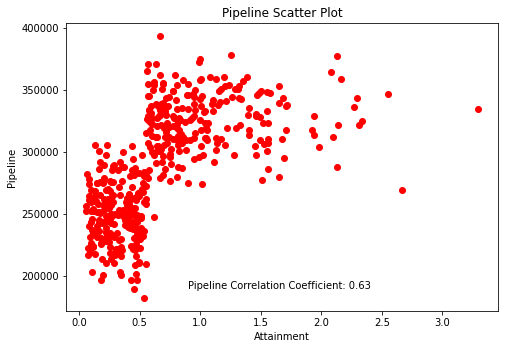

In [ ]:
# 2. A scatterplot of each of your selected variables with the output variable

strong_variables = sales[["Attainment", "Pipeline", "Live", "Engagement", "Sentiment"]]

s = "Pipeline Correlation Coefficient: " + str(round(strong_variables["Attainment"].corr(strong_variables["Pipeline"]),2))
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.scatter(strong_variables["Attainment"], strong_variables["Pipeline"], color='r')
ax.set_xlabel("Attainment")
ax.set_ylabel("Pipeline")
ax.set_title("Pipeline Scatter Plot")
ax.text(.9,190000,s=s)
plt.show()

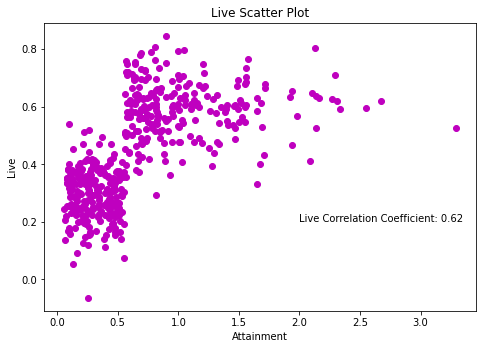

In [ ]:
s = "Live Correlation Coefficient: " + str(round(strong_variables["Attainment"].corr(strong_variables["Live"]),2))
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.scatter(strong_variables["Attainment"], strong_variables["Live"], color='m')
ax.set_xlabel("Attainment")
ax.set_ylabel("Live")
ax.set_title("Live Scatter Plot")
ax.text(2,.2,s=s)
plt.show()

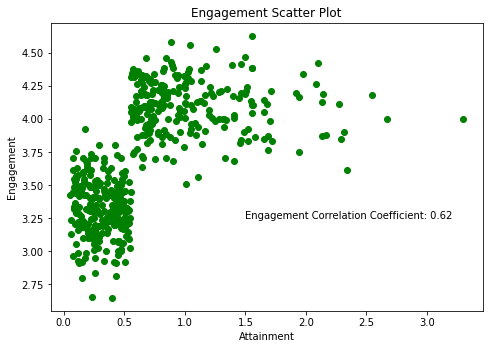

In [ ]:
s = "Engagement Correlation Coefficient: " + str(round(strong_variables["Attainment"].corr(strong_variables["Engagement"]),2))
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.scatter(strong_variables["Attainment"], strong_variables["Engagement"], color='g')
ax.set_xlabel("Attainment")
ax.set_ylabel("Engagement")
ax.set_title("Engagement Scatter Plot")
ax.text(1.5,3.25,s=s)
plt.show()

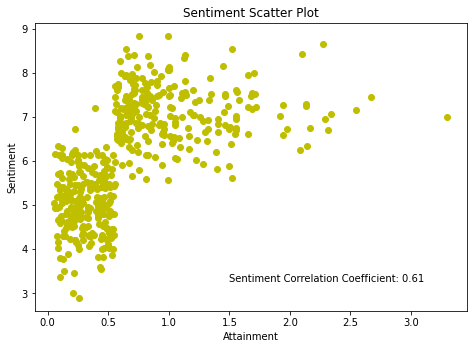

In [ ]:
s = "Sentiment Correlation Coefficient: " + str(round(strong_variables["Attainment"].corr(strong_variables["Sentiment"]),2))
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.scatter(strong_variables["Attainment"], strong_variables["Sentiment"], color='y')
ax.set_xlabel("Attainment")
ax.set_ylabel("Sentiment")
ax.set_title("Sentiment Scatter Plot")
ax.text(1.5,3.25,s=s)
plt.show()

Thank you for reading this report!